### Programming for Psychologists (2024/2025)
# Home assigment
**Student: Anna Pecherkina**\
Course code: M_PROPSY\
Course coordinator: Matthias Nau

Description:

#### Find and read files with data

In [ ]:
import os
from nilearn import image

# Find files in the directory 'data'
files = os.listdir('data')
uniformity_test_file = [f for f in files if ('uniformity-test' in f) and ('.nii' in f)]
anatomical_file = [f for f in files if ('anatomical' in f) and ('.nii' in f)]

# Read structural MRI data
anatomical = image.load_img('data/' + anatomical_file[0])
# Read functional MRI data
functional = image.load_img('data/' + uniformity_test_file[0])

#### Visualize functional data ontop of the anatomical scan

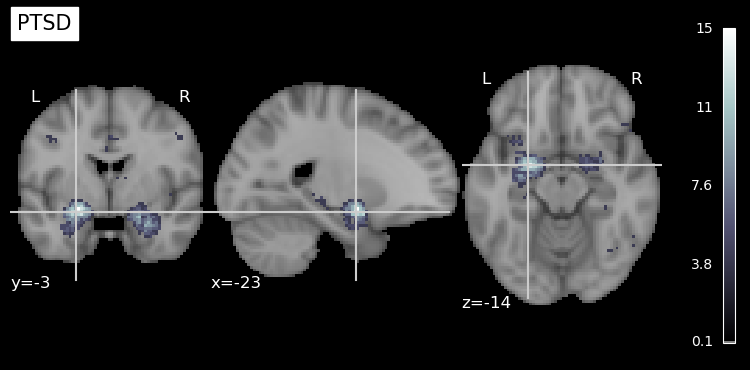

In [2]:
from nilearn import plotting
import matplotlib.pyplot as plt

# Visualization functional data ontop of the anatomical scan
display = plotting.plot_stat_map(stat_map_img=functional,
                                 bg_img=anatomical,
                                 cmap=plt.get_cmap("bone"),
                                 title="PTSD",
                                 threshold=0.1,
                                 cut_coords=(-23, -3, -14))

# Output to file
display.savefig('results/ptsd_scan.png')
# Show on screen
plt.show()

#### Plotting a histogram of the values in the functional data file

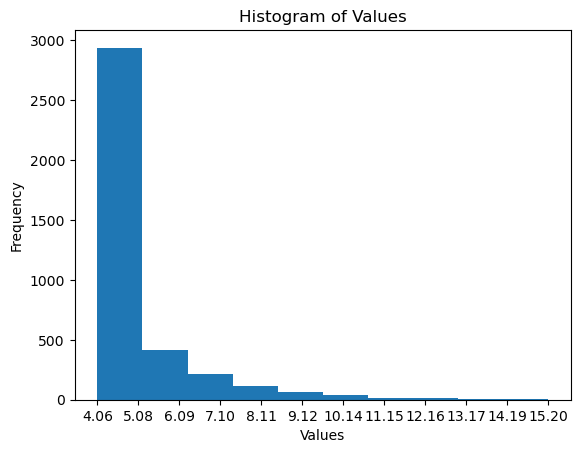

In [3]:
import nibabel as nib

# Histogram
data_file = nib.load('data/' + uniformity_test_file[0])
data_array = data_file.get_fdata()

# Read data from three-dimensions array
results_for_histogram = []
for x in data_array:
    for y in x:
        for z in y:
            if z > 0:
                results_for_histogram.append(z)

# Visualize data
plt.hist(results_for_histogram)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.xticks(sorted(set(results_for_histogram)))

#Save results to the file
plt.savefig('results/histogram.png')
